In [3]:
#Requried intership
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
#getting dataset-->Source(Github)
df = pd.read_csv("https://raw.githubusercontent.com/wessamsw/California_Houses_Price_Prediction/main/housing.csv")

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
#EDD
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df['total_bedrooms'].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.], shape=(1924,))

In [8]:
df['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2009.0     1
2249.0     1
3114.0     1
1625.0     1
1742.0     1
Name: count, Length: 1923, dtype: int64

In [9]:
df['total_bedrooms'].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [10]:
df['total_bedrooms']=df['total_bedrooms'].fillna(280)

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
##remove the unwanted coloum
df.drop(columns=['ocean_proximity'],axis=1,inplace=True)

In [13]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


Train and Test and split

In [14]:
X=df.iloc[:,:-1]#except last cl all 
y=df.iloc[:,-1]#only last cl

In [15]:
X.head(1)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252


In [16]:
y.head(1)

0    452600.0
Name: median_house_value, dtype: float64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


In [28]:
X_train.shape

(16512, 8)

In [30]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

In [29]:
y_train.shape

(16512,)

#feature scaling

In [20]:
scaler=StandardScaler()

In [21]:
X_train_scaled=scaler.fit_transform(X_train)

In [22]:
X_train_scaled

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.76827628,
         0.32290591, -0.326196  ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.09890135,
         0.6720272 , -0.03584338],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.44981806,
        -0.43046109,  0.14470145],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.28983345,
         0.07090859, -0.49697313],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.30830275,
         0.15490769,  0.96545045],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.04883375,
         1.94776365, -0.68544764]], shape=(16512, 8))

In [23]:
X_test_scaled=scaler.transform(X_test)

In [24]:
X_test_scaled

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.03030109,
        -0.37008673, -1.15508475],
       [ 0.06097472, -0.23549054,  0.11043502, ...,  0.12185077,
         0.220532  , -0.70865905],
       [-1.42487026,  1.00947776,  1.85617335, ..., -0.10241931,
         1.21539643, -0.21040155],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ...,  0.13944058,
         0.17853244,  2.80902421],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.17541702,
        -0.06821494, -0.57542978],
       [ 0.60445493, -0.66608108, -0.92113763, ...,  0.21507676,
        -0.13646421, -0.17259111]], shape=(4128, 8))

#Model Building

In [31]:
X_test_Scaled=scaler.transform(X_test)

In [33]:
X_test_scaled

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.03030109,
        -0.37008673, -1.15508475],
       [ 0.06097472, -0.23549054,  0.11043502, ...,  0.12185077,
         0.220532  , -0.70865905],
       [-1.42487026,  1.00947776,  1.85617335, ..., -0.10241931,
         1.21539643, -0.21040155],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ...,  0.13944058,
         0.17853244,  2.80902421],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.17541702,
        -0.06821494, -0.57542978],
       [ 0.60445493, -0.66608108, -0.92113763, ...,  0.21507676,
        -0.13646421, -0.17259111]], shape=(4128, 8))

#MODEL BUILDING

model=LinearRegression()

In [34]:
model.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_pred=model.predict(X_test_Scaled)

In [38]:
y_pred

array([ 45716.2715471 , 136324.27452781, 235052.87449613, ...,
       439178.19697502, 130408.85287046, 175272.25192552], shape=(4128,))

#model performance

In [39]:
mse=mean_squared_error(y_test,y_pred)

In [40]:
mse

5097528478.380108

In [41]:
accuracy=r2_score(y_test,y_pred)

In [42]:
accuracy

0.6109971342517007

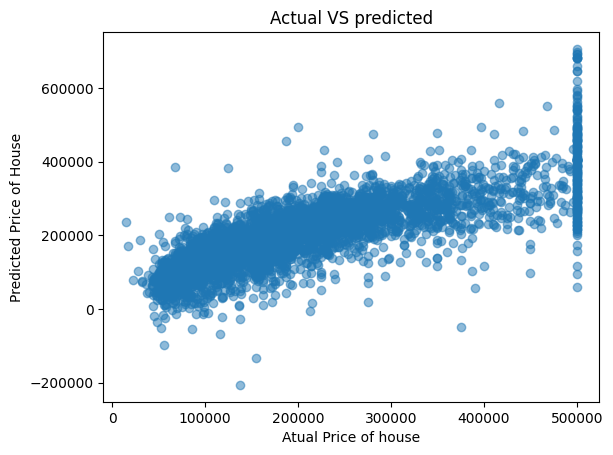

In [43]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel('Atual Price of house')
plt.ylabel('Predicted Price of House')
plt.title('Actual VS predicted')
plt.show()

In [44]:

print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Slope (m): -85503.21815336386
Intercept (c): 207194.69373788778
